<a href="https://colab.research.google.com/github/ecorralro/ENTREGA1-CRUDarray/blob/main/LAB_Deep_Learning_Introduction_to_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Iteration 1: Cat vs NoCat Classification

In this iteration, we will focus on building a model capable of distinguishing between images that contain cats and those that do not. The goal is to create a binary classification system that can accurately predict whether a given image belongs to the "Cat" class or the "NoCat" class

To achieve this, we will start by loading and exploring the dataset, followed by preprocessing the images to ensure they are suitable for training a Convolutional Neural Network (CNN). This step lays the foundation for building an effective model that can identify cats in images with high accuracy.

#### **NOTE**: Remeber import necesary libraries for this notebook.

### Step 1: Load the Dataset

The first step is to obtain the dataset from [Kaggle](https://www.kaggle.com/datasets/muhammeddalkran/catvnoncat). For this lab, we will be using a dataset containing images of cats and non-cats. The dataset is typically stored in a compressed format, such as a .zip file, which you will need to extract to access the images.

In [ ]:
# # Your code goes here ...
# !pip install kaggle

# import os

# # Set up Kaggle API credentials
# os.environ['KAGGLE_USERNAME'] = 'eugeniocorral'
# os.environ['KAGGLE_KEY'] = 'your_kaggle_api_key'

# # Download a dataset
# !kaggle datasets download -d dataset-owner/dataset-name

# # Unzip the downloaded dataset
# import zipfile
# with zipfile.ZipFile('dataset-name.zip', 'r') as zip_ref:
#     zip_ref.extractall('path_to_extract')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Step 2: Extract the Data

In this step, we'll extract the images and labels from the `HDF5` files. These files contain the preprocessed dataset that we will use to train and evaluate our model. The h5py library allows us to efficiently load the data into memory.

In the context of handling datasets stored in `HDF5` files, the images are typically already stored as arrays within the file. Therefore, when you load them using h5py, they are directly loaded as NumPy arrays, which is the format you would typically work with in machine learning pipelines.

In [1]:
import h5py
import numpy as np

# Rutas de los archivos
train_path = '/content/train_catvnoncat.h5'
test_path = '/content/test_catvnoncat.h5'

# Cargar los datos de entrenamiento
with h5py.File(train_path, 'r') as train_file:
    train_images = np.array(train_file['train_set_x'][:])  # Imágenes
    train_labels = np.array(train_file['train_set_y'][:])  # Etiquetas

# Cargar los datos de prueba
with h5py.File(test_path, 'r') as test_file:
    test_images = np.array(test_file['test_set_x'][:])  # Imágenes
    test_labels = np.array(test_file['test_set_y'][:])  # Etiquetas

# Verificar las dimensiones
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


Train images shape: (209, 64, 64, 3)
Train labels shape: (209,)
Test images shape: (50, 64, 64, 3)
Test labels shape: (50,)


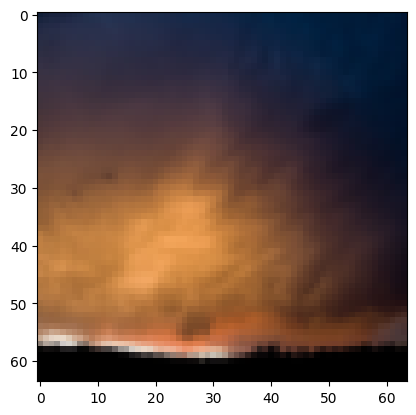

In [5]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])

### Step 3: Preprocess the Images

Before feeding the images into a model, we need to preprocess them. Common preprocessing steps include:
- **Normalizing** the pixel values.
- **Resizing** the images.

In [3]:

from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from PIL import Image

# Definir tamaño deseado para las imágenes
target_size = (64, 64)  # Por ejemplo, 64x64 píxeles

# Normalizar los píxeles: dividir entre 255 para tener valores entre 0 y 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Redimensionar las imágenes al tamaño deseado
train_images_resized = np.array([resize(img, target_size).numpy() for img in train_images])
test_images_resized = np.array([resize(img, target_size).numpy() for img in test_images])

# Asegurarse de que las etiquetas sean categóricas (si se usa clasificación)
train_labels_categorical = to_categorical(train_labels, num_classes=2)  # 2 clases: gato y no gato
test_labels_categorical = to_categorical(test_labels, num_classes=2)

# Verificar las formas de los datos preprocesados
print(f"Train images resized shape: {train_images_resized.shape}")
print(f"Test images resized shape: {test_images_resized.shape}")
print(f"Train labels categorical shape: {train_labels_categorical.shape}")
print(f"Test labels categorical shape: {test_labels_categorical.shape}")


Train images resized shape: (209, 64, 64, 3)
Test images resized shape: (50, 64, 64, 3)
Train labels categorical shape: (209, 2)
Test labels categorical shape: (50, 2)


### Step 4: Build and compile the Model

Now, let's build a Convolutional Neural Network (CNN) model using  `TensorFlow/Keras`. The model will have several convolutional layers followed by pooling layers, and finally, fully connected layers for classification.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Your code goes here ...
# Definir la arquitectura del modelo
model = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Tercera capa convolucional
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Aplanar las características
    Flatten(),

    # Capa completamente conectada
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularización para evitar overfitting

    # Capa de salida
    Dense(2, activation='softmax')  # 2 clases: gato y no gato
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

### Step 5: Model summary

To better understand our model, let's visualize its architecture using a simple plot.
- **Summary**
- **Architecture visualization**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 12.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


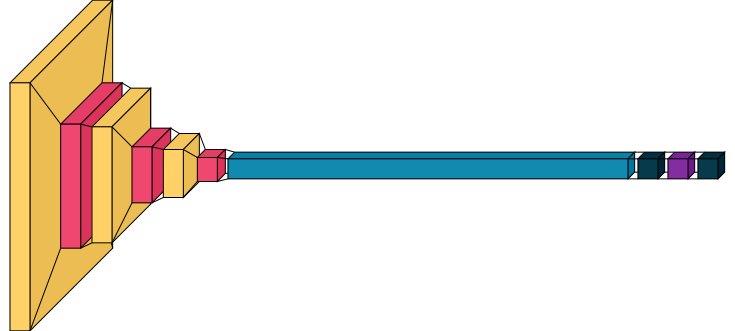

In [9]:
!pip install visualkeras
import visualkeras

# Your code goes here ...
visualkeras.layered_view(model)

### Step 6: Train and evaluate the Model

Train the model on the training set and evaluate its performance on the test set. You can start with `10 epochs`.

In [11]:
# Your code goes here ...
history = model.fit(train_images_resized, train_labels_categorical,
                    validation_data=(test_images_resized, test_labels_categorical),
                    epochs=10,
                    batch_size=32)
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images_resized, test_labels_categorical, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.8582 - loss: 0.2810 - val_accuracy: 0.8400 - val_loss: 0.5948
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.8813 - loss: 0.2574 - val_accuracy: 0.8600 - val_loss: 0.5097
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.9048 - loss: 0.2204 - val_accuracy: 0.8800 - val_loss: 0.4616
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.8985 - loss: 0.2333 - val_accuracy: 0.8400 - val_loss: 0.5946
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.9101 - loss: 0.1855 - val_accuracy: 0.6400 - val_loss: 1.0847
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 384ms/step - accuracy: 0.9265 - loss: 0.1852 - val_accuracy: 0.7200 - val_loss: 0.9139
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.9522 - loss: 0.1517 - val_accuracy: 0.7800 - val_loss: 0.8165
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.9372 - loss: 0.1408 - val_accuracy: 0.8000 - val_loss:

### Step 7: Visualizing the results

After training your model, it’s important to visualize the performance metrics to understand how well your model is performing. Visualize at least:
- **Confusion matrix**.
- **Accuracy**.
- **Loss**.

If you find it interesting, you can also consider visualizing additional metrics such as precision, recall, F1-score, or any other relevant performance metrics that could provide further insights into your model's behavior.

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step


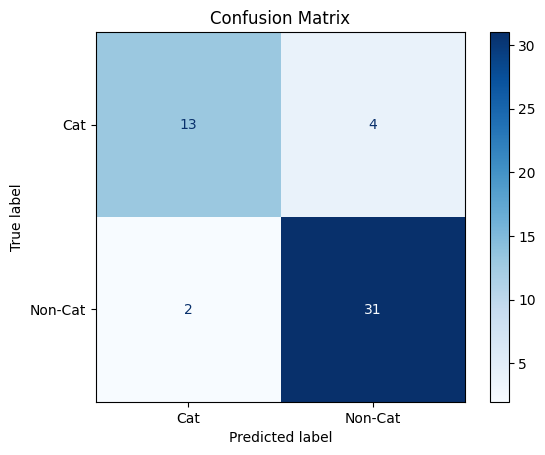

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Your code goes here ...
# Predecir etiquetas del conjunto de prueba
y_pred = model.predict(test_images_resized)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir a clases (0 o 1)
y_true = np.argmax(test_labels_categorical, axis=1)  # Etiquetas reales

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Non-Cat'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.metrics import classification_report

# Generar reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=['Cat', 'Non-Cat'])
print(report)

              precision    recall  f1-score   support

         Cat       0.87      0.76      0.81        17
     Non-Cat       0.89      0.94      0.91        33

    accuracy                           0.88        50
   macro avg       0.88      0.85      0.86        50
weighted avg       0.88      0.88      0.88        50



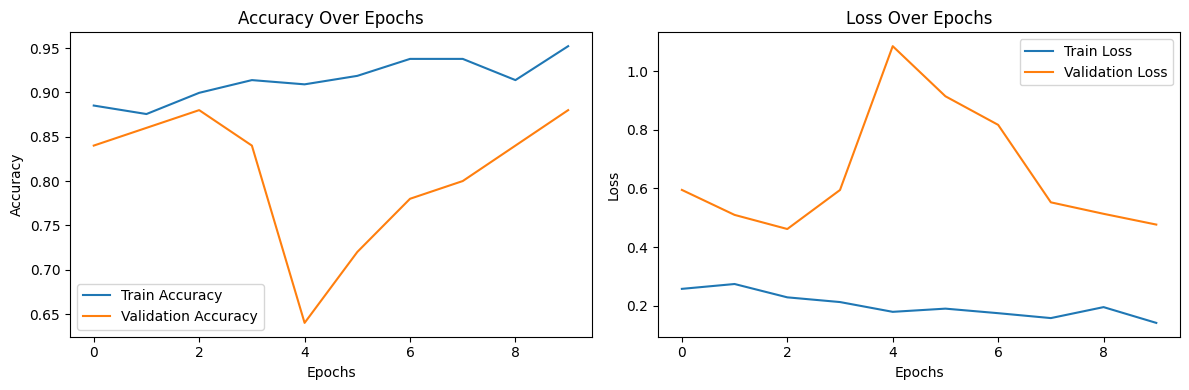

In [14]:
# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()


### Step 8: Make Predictions with New Images

Finally, let's search for some images online or use local images to test the model's predictions. We'll preprocess these images similarly to our training data.

In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


def preprocess_new_image(image_path, target_size=(64, 64)):
    """
    Carga y preprocesa una nueva imagen.
    Args:
        image_path (str): Ruta de la imagen.
        target_size (tuple): Tamaño al que redimensionar la imagen.
    Returns:
        np.array: Imagen preprocesada lista para el modelo.
    """
    # Cargar la imagen
    img = load_img(image_path, target_size=target_size)

    # Convertir a un array
    img_array = img_to_array(img)

    # Normalizar los píxeles (0-255 -> 0-1)
    img_array = img_array / 255.0

    # Añadir dimensión de lote (batch_size=1)
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

def predict_new_image(image_path, model):
    """
    Realiza una predicción en una nueva imagen.
    Args:
        image_path (str): Ruta de la imagen.
        model (keras.Model): Modelo entrenado.
    Returns:
        str: Clase predicha.
    """
    # Preprocesar la imagen
    preprocessed_image = preprocess_new_image(image_path)

    # Realizar predicción
    prediction = model.predict(preprocessed_image)

    # Obtener la clase predicha
    class_idx = np.argmax(prediction)
    class_labels = ['Cat', 'Non-Cat']  # Etiquetas de clases

    return class_labels[class_idx]


In [22]:
# Ruta a una imagen local
new_image_path = '/leon.jpeg'  # Reemplaza con la ruta de tu imagen

# Realizar predicción
predicted_class = predict_new_image(new_image_path, model)

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class: Cat


## Iteration 2: Fashion MNIST Classification

In this iteration, we will work with the [Fashion MNIST dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist), which is a drop-in replacement for the classic MNIST dataset but with more complex images representing different types of clothing and accessories. The goal of this iteration is to build a Convolutional Neural Network (CNN) to classify images of fashion items into one of the 10 categories provided by the dataset.

| Label | Description   |
|-------|---------------|
| 0     | T-shirt/top   |
| 1     | Trouser       |
| 2     | Pullover      |
| 3     | Dress         |
| 4     | Coat          |
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |
| 8     | Bag           |
| 9     | Ankle boot    |

The Fashion MNIST dataset consists of 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28x28 pixels), as seen in the figure below:

![](https://miro.medium.com/v2/resize:fit:1400/1*1zuF9G8fq3hUTafkBLcRkQ.png)

### Step 1: Load the Dataset

We'll begin by importing the necessary libraries and loading the [Fashion MNIST dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist), which is available directly through TensorFlow's keras.datasets module.

In [ ]:
# Your code goes here ...

### Step 2: Preprocess the Images

In this step, we ensure that the images are preprocessed and ready to be fed into the neural network.

In [ ]:
# Your code goes here ...

### Step 3: Visualize the Dataset

Before building the model, it's useful to visualize some examples from the dataset to understand the nature of the images. This will give you insight into what the model will be learning to classify.

In [ ]:
# Your code goes here ...

### Step 4: Build and Compile the Model

We will build a Convolutional Neural Network (CNN) using TensorFlow/Keras. The model will consist of multiple convolutional layers followed by pooling layers and fully connected layers.

In [ ]:
# Your code goes here ...

### Step 5: Model summary

To better understand our model, let's visualize its architecture using a simple plot.
- **Summary**
- **Architecture visualization**

In [ ]:
import visualkeras

# Your code goes here ...

### Step 6: Train the Model

Now, we train the model on the training data and validate it on the test data.

In [ ]:
# Your code goes here ...

### Step 7: Evaluate the Model

After training, evaluate the model’s performance on the test dataset to see how well it generalizes.

In [ ]:
# Your code goes here ...

### Step 8: Visualize the Results

After training your model, it’s important to visualize the performance metrics to understand how well your model is performing. Visualize at least:
- **Confusion matrix**.
- **Accuracy**.
- **Loss**.

If you find it interesting, you can also consider visualizing additional metrics such as precision, recall, F1-score, or any other relevant performance metrics that could provide further insights into your model's behavior.

In [ ]:
# Your code goes here ...

### Step 9: Make Predictions with New Images

Finally, let's search for some images online or use local images to test the model's predictions. We'll preprocess these images similarly to our training data.

In [ ]:
# Your code goes here ...